In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [53]:
df=pd.read_csv('/content/Mall_Customers.csv')


In [54]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
mask=df['Spending Score (1-100)']>50
df_mask_score=df[mask]
df_mask_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [58]:
df_mask_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


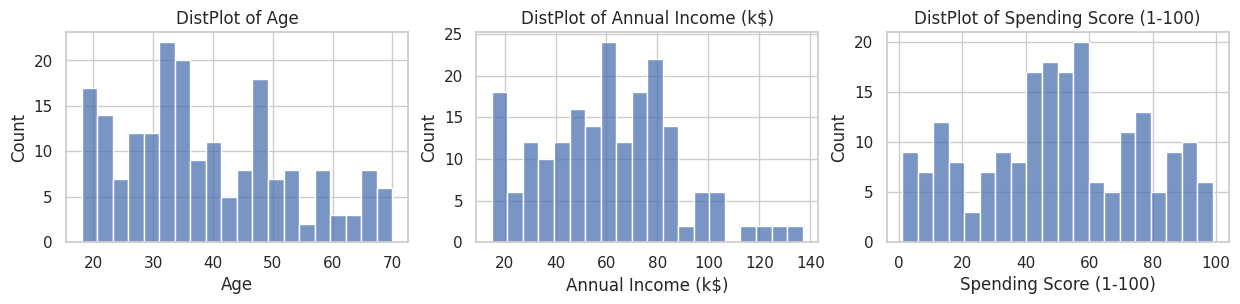

In [59]:
plt.figure(figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)' ]:
  n+=1
  plt.subplot(2,3,n)
  plt.subplots_adjust(hspace=0.2,wspace=0.2)
  sns.histplot(df[x],bins=20)
  plt.title('DistPlot of {}'.format(x))
plt.show();

Text(0.5, 1.0, 'Spending Score(51~100): Age Distribution')

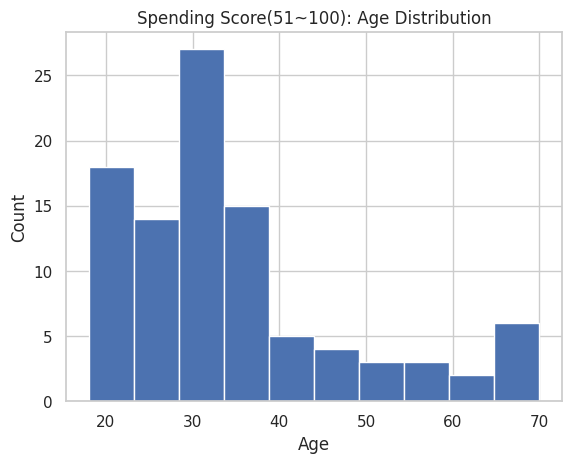

In [60]:
df_mask_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51~100): Age Distribution')

**As we see that age below 40 are spending more money **


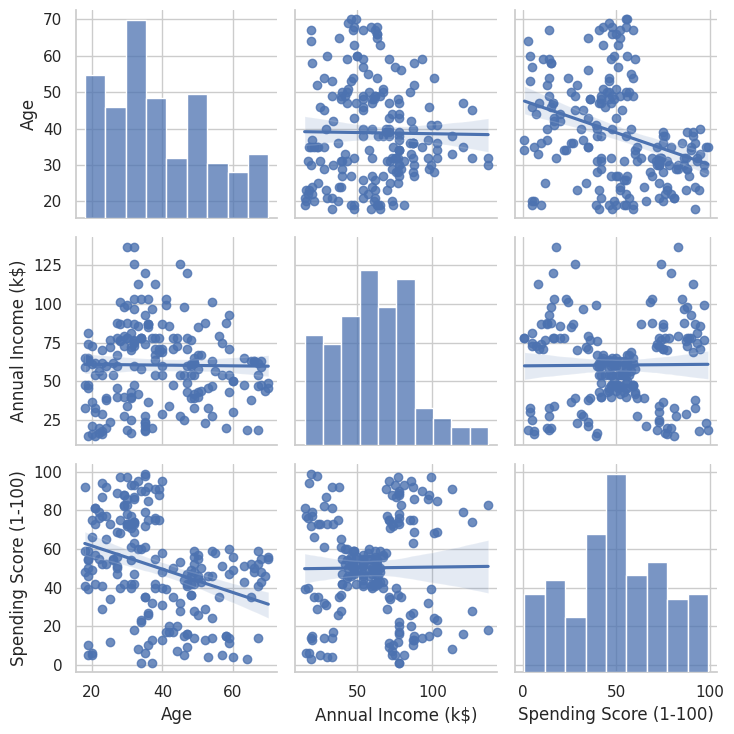

In [61]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']],kind="reg")
plt.tight_layout()
plt.show()


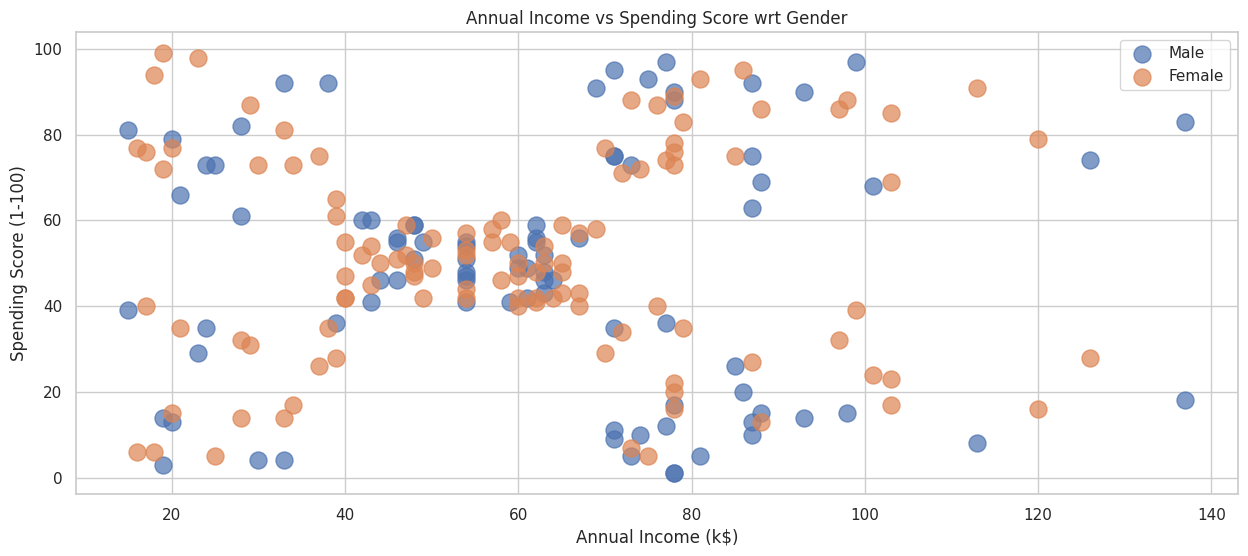

In [62]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data =df[df['Gender'] == gender],s = 150,alpha = 0.7,label = gender)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score wrt Gender')
plt.legend()
plt.show()

<ipython-input-63-cb29710adeb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y="Gender",data=df,palette='vlag')
<ipython-input-63-cb29710adeb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y="Gender",data=df,palette='vlag')
<ipython-input-63-cb29710adeb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y="Gender",data=df,palette='vlag')


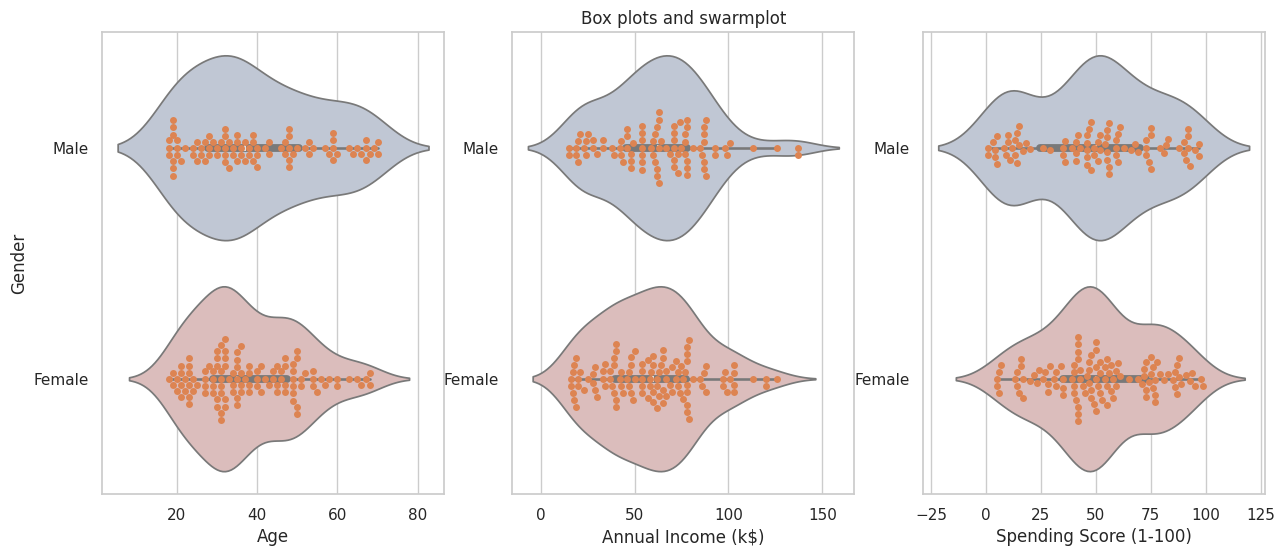

In [63]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.2,wspace=0.2)
  sns.violinplot(x=cols, y="Gender",data=df,palette='vlag')
  sns.swarmplot(x=cols,y="Gender",data=df)
  plt.ylabel("Gender" if n==1 else "")
  plt.title("Box plots and swarmplot"if n==2 else "")
plt.show()

In [64]:
X=df.iloc[:,[3,4]]
print(f"X shape {X.shape}")
X.head()

X shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Now selecting the optimal number of clusters **


In [65]:
from sklearn.metrics import silhouette_score

n_clusters=range(2,11)
interia_errors=[]
silhoutte_scores=[]
for k in n_clusters:
  model=KMeans(n_clusters=k,random_state=42,n_init=10)
  model.fit(X)
  interia_errors.append(model.inertia_)
  silhoutte_scores.append(silhouette_score(X,model.labels_))
print("Inertia_score is :",interia_errors[:10])
print()
print("Silhouette_score :",silhoutte_scores[:10])

Inertia_score is : [181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]

Silhouette_score : [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5264283703685728, 0.45827056882053113, 0.4553729779390266, 0.45925273534781125]


**Taking Elbow plot for optimal numbe of cluster**

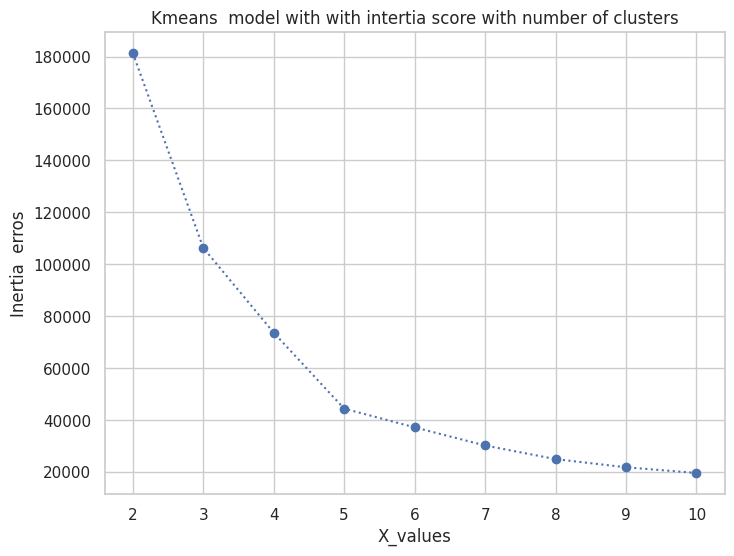

In [66]:
x_values=list(range(2,11))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values,interia_errors,marker='o',linestyle=':',color='b')
plt.title("Kmeans  model with with intertia score with number of clusters")
plt.xlabel("X_values")
plt.ylabel("Inertia  erros")
plt.grid(True)
plt.show()

**Now take for the silhoutte score**

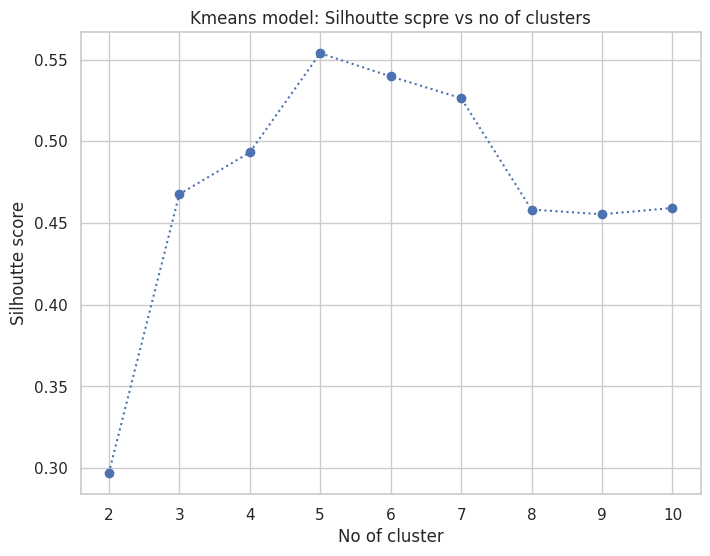

In [67]:
x_values=list(range(2,11))
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
plt.plot(x_values,silhoutte_scores,marker='o',color='b',linestyle=':')
plt.title("Kmeans model: Silhoutte scpre vs no of clusters")
plt.xlabel("No of cluster")
plt.ylabel("Silhoutte score")
plt.show()

**Silhoutte score should be maximum for the for clustering and at cluster 5 we got highest silhote**

In [68]:
final_model=KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [69]:
labels=final_model.labels_
centeroids=final_model.cluster_centers_
print(labels[:5])
print(centeroids[:10])

[2 3 2 3 2]
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


**NOW PLOTTING THE KmEANS MODEL**

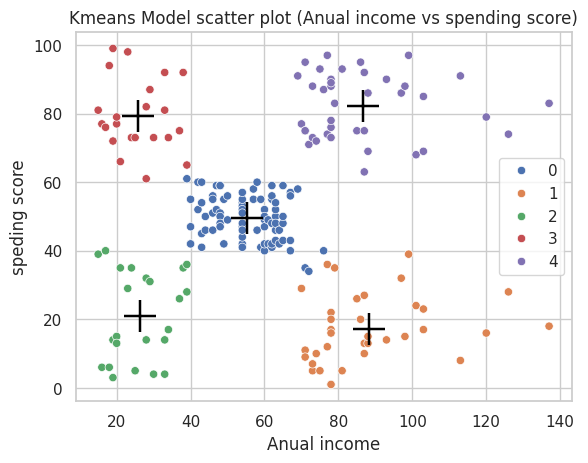

In [70]:
sns.scatterplot(x=df['Annual Income (k$)'],	y=df['Spending Score (1-100)'],hue=labels,palette="deep")
sns.scatterplot(
    x=centeroids[:,0],
    y=centeroids[:,1],
    color="black",
    marker="+",
    s=500)
plt.title("Kmeans Model scatter plot (Anual income vs spending score)")
plt.xlabel("Anual income")
plt.ylabel("speding score")
plt.show()


In [71]:
xgb=X.groupby(final_model.labels_).mean()


In [72]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205
